In [121]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [122]:
df = pd.read_csv('C:/Users/goutham/Desktop/Sallie Mae/prosperLoanData.csv')

In [123]:
# Exploratory data analysis
df.isnull().sum() # Check for null values


ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [124]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRatingnumeric,ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


C:\Users\goutham\AppData\Local\Temp\ipykernel_14400\3589202098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanOriginalAmount'])


<Axes: xlabel='LoanOriginalAmount', ylabel='Density'>

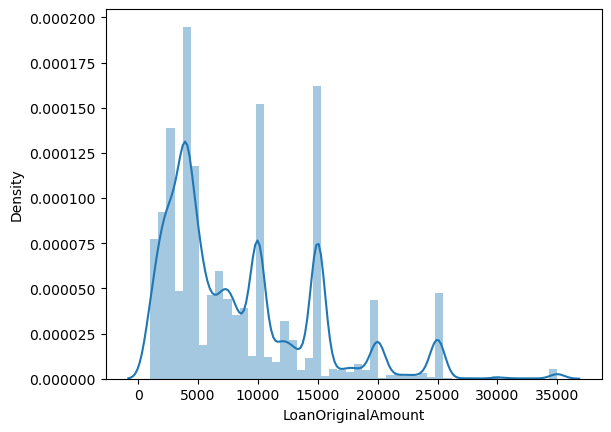

In [125]:
sns.distplot(df['LoanOriginalAmount'])

<Axes: xlabel='ProsperRatingnumeric', ylabel='LoanOriginalAmount'>

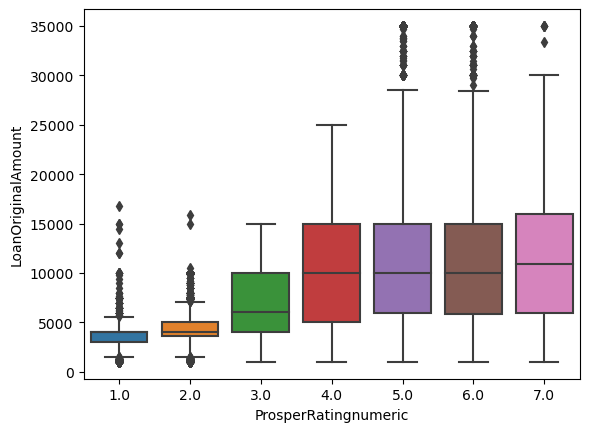

In [126]:
sns.boxplot(x='ProsperRatingnumeric', y='LoanOriginalAmount', data=df)


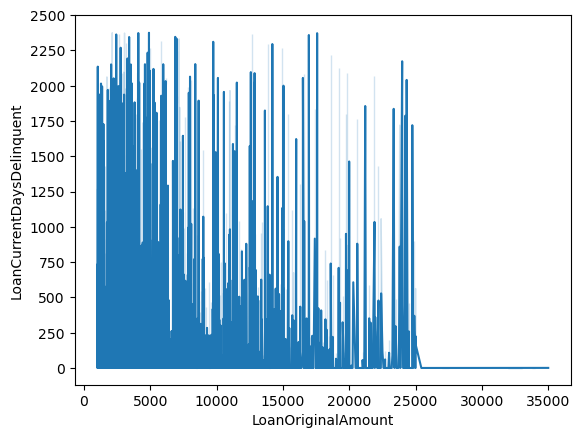

In [127]:

sns.lineplot(x='LoanOriginalAmount', y='LoanCurrentDaysDelinquent', data=df)
plt.yticks(range(0, df['LoanCurrentDaysDelinquent'].max() + 1, 250))
plt.show()

plt.yticks(range(0, df['LoanCurrentDaysDelinquent'].max() + 1, 250))

In [128]:
mask = ~df.LoanOriginalAmount.isnull()

X = X[mask]  
y = y[mask]

C:\Users\goutham\AppData\Local\Temp\ipykernel_14400\1948228122.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[mask]


In [129]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [130]:
df['int_rate'] = df['BorrowerAPR'].astype(float) 

In [131]:
df = X.join(y)
X = df[['BorrowerRate', 'DebtToIncomeRatio','int_rate']] 
y = df['LoanCurrentDaysDelinquent']

In [132]:
X = X.dropna()  
y = y.dropna()

In [133]:
print(X.shape) 
print(y.shape)

(105358, 3)
(105358,)


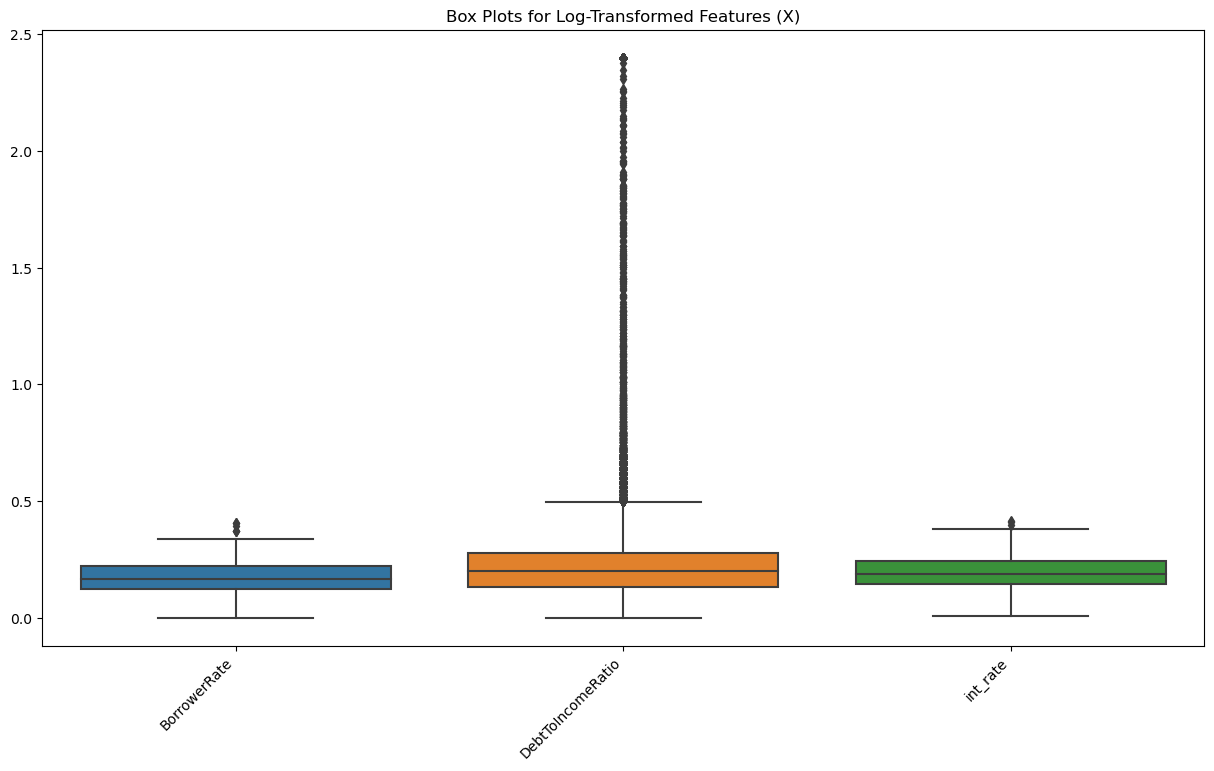

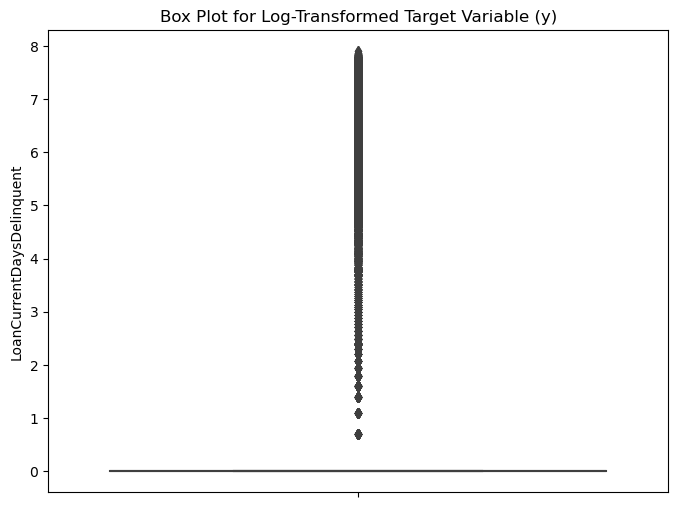

In [134]:
 import numpy as np

# Log transformation for X
X_log_transformed = np.log1p(X)

# Log transformation for y
y_log_transformed = np.log1p(y)

# Plot box plots for the log-transformed X
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_log_transformed)
plt.title("Box Plots for Log-Transformed Features (X)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Plot box plot for the log-transformed y
plt.figure(figsize=(8, 6))
sns.boxplot(y=y_log_transformed)
plt.title("Box Plot for Log-Transformed Target Variable (y)")
plt.show()


In [135]:
# Calculate summary statistics for original and log-transformed X
original_X_stats = X.describe()
log_transformed_X_stats = X_log_transformed.describe()

# Calculate summary statistics for original and log-transformed y
original_y_stats = y.describe()
log_transformed_y_stats = y_log_transformed.describe()

print("Original X Stats:\n", original_X_stats)
print("\nLog-Transformed X Stats:\n", log_transformed_X_stats)

print("\nOriginal y Stats:\n", original_y_stats)
print("\nLog-Transformed y Stats:\n", log_transformed_y_stats)


Original X Stats:
         BorrowerRate  DebtToIncomeRatio       int_rate
count  105358.000000      105358.000000  105358.000000
mean        0.190617           0.275993       0.216241
std         0.074091           0.551814       0.079513
min         0.000000           0.000000       0.006530
25%         0.131400           0.140000       0.154250
50%         0.180000           0.220000       0.207050
75%         0.249200           0.320000       0.276370
max         0.497500          10.010000       0.512290

Log-Transformed X Stats:
         BorrowerRate  DebtToIncomeRatio       int_rate
count  105358.000000      105358.000000  105358.000000
mean        0.172552           0.219529       0.193642
std         0.061839           0.168291       0.065078
min         0.000000           0.000000       0.006509
25%         0.123456           0.131028       0.143451
50%         0.165514           0.198851       0.188179
75%         0.222503           0.277632       0.244020
max         0.40379

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [137]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.coef_)
print(lm.intercept_)

[-129.28564365   -0.5425345   153.99013022]
143.37738321223318


In [138]:
lm_predictions = lm.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, lm_predictions)))

467.76419410728624


In [140]:
# KNearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train) 


KNeighborsRegressor()

In [141]:
knn_predictions = knn.predict(X_test)
print("\nKNN:")
print(np.sqrt(mean_squared_error(y_test, knn_predictions)))


KNN:
509.3146785131215


#### The RMSE of 509 indicates that on average, the KNN model's predictions for the loan delinquency (y_test) are off by around 509 days compared to the actual values.
#### This is quite a high error, showing the KNN model is not very accurate at predicting the loan delinquency using the features like borrower rate, debt-to-income ratio etc.
#### The poor KNN performance suggests more predictive features need to be engineered from the Prosper loans data to better explain the loan delinquency.


## Logistic_Regression

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

C:\Users\goutham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1))
model.fit(X_train, y_train)
y_pred_logreg = model.predict(X_test)


C:\Users\goutham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear regression

In [112]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [113]:
print("\nLinear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))



Linear Regression:
Mean Squared Error: 218803.34128883897


## Random Forest Regression

In [114]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)


In [115]:
print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regression:
Mean Squared Error: 268026.0218094038


## Decision tree

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_reg = DecisionTreeRegressor(random_state=42)


dt_reg.fit(X_train, y_train)


y_pred_dt = dt_reg.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regression:\nMean Squared Error:", mse_dt)


Decision Tree Regression:
Mean Squared Error: 328114.3390763531
